In [1]:
from tensorflow import keras;
import tensorflow as tf;

import pandas as pd;
from sklearn.metrics import accuracy_score;
import seaborn as sns;
import matplotlib.pyplot as plt;

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler;

In [2]:
import tensorflow as tf;
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
dataset = pd.read_csv("datasets/california_housing_sklearn.csv");

In [4]:
dataset.head(8)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414


C:\Users\arunk\AppData\Local\Temp\ipykernel_15208\462184918.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["HouseAge"])


<AxesSubplot: xlabel='HouseAge', ylabel='Density'>

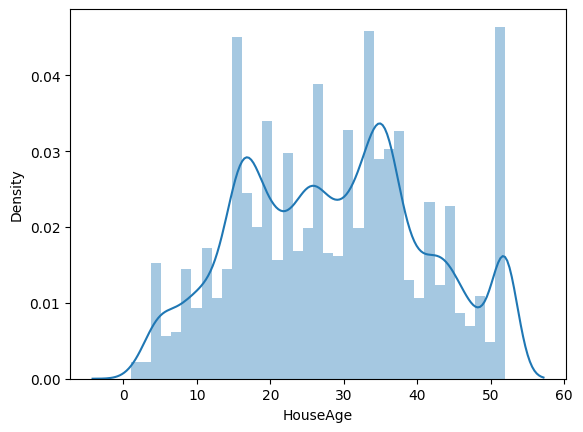

In [5]:
sns.distplot(dataset["HouseAge"])

In [6]:
dataset.corr()["SalePrice"]

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
SalePrice     1.000000
Name: SalePrice, dtype: float64

In [7]:
bank_note_dataset = pd.read_csv("datasets/data_banknote_authentication.txt")

In [8]:
bank_note_dataset.head()


,col1,col2,col3,col4,result
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
print(len(bank_note_dataset))

1372


In [10]:
from sklearn.model_selection import train_test_split;

In [11]:
indep_features = ["col1", "col2", "col3", "col4"];
dep_feature = "result";

X = bank_note_dataset[indep_features];
y = bank_note_dataset[[dep_feature]];

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10);

In [13]:
len(X_train)

960

In [14]:
X_train

,col1,col2,col3,col4
106,2.31360,10.66510,-3.52880,-4.767200
73,4.16540,-3.44950,3.64300,1.087900
554,2.64630,-4.81520,6.35490,0.003003
1114,-1.05550,0.79459,-1.69680,-0.467680
1221,-1.83560,-6.75620,5.05850,-0.550440
...,...,...,...,...
1147,-1.69880,-7.11630,5.79020,0.167230
1344,1.34510,0.23589,-1.87850,1.325800
527,2.53280,7.52800,-0.41929,-2.647800
1149,0.33325,3.31080,-4.50810,-4.012000


In [15]:
y_train

,result
106,0
73,0
554,0
1114,1
1221,1
...,...
1147,1
1344,1
527,0
1149,1


In [16]:
scaler = MinMaxScaler();

In [17]:
scaler.fit(X_train);

X_train = scaler.transform(X_train);

In [18]:
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;

In [19]:
model = Sequential();

model.add(Dense(30, activation = "relu"));
model.add(Dense(15, activation = "relu"));

model.add(Dense(1, activation = "sigmoid"));

In [20]:
model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [21]:
from tensorflow.keras.callbacks import EarlyStopping;

In [22]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 30);

In [23]:
model.fit(x = X_train, y = y_train, epochs = 10, validation_data = (X_test, y_test), verbose = 1, 
          callbacks = [early_stopping])

Epoch 1/10
30/30 [==============================] - 1s 11ms/step - loss: 0.6586 - val_loss: 0.5266
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 0.6262 - val_loss: 0.3922
Epoch 3/10
30/30 [==============================] - 0s 5ms/step - loss: 0.5799 - val_loss: 0.4002
Epoch 4/10
30/30 [==============================] - 0s 5ms/step - loss: 0.5322 - val_loss: 0.4128
Epoch 5/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4890 - val_loss: 0.4775
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4520 - val_loss: 0.4658
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4189 - val_loss: 0.4700
Epoch 8/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3894 - val_loss: 0.4308
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3630 - val_loss: 0.3917
Epoch 10/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3385 - val_loss: 0.3382


In [24]:
model_hist_df = pd.DataFrame(model.history.history)

In [25]:
model_hist_df.head()

,loss,val_loss
0,0.658648,0.526633
1,0.626213,0.392218
2,0.579887,0.400249
3,0.532170,0.412776
4,0.489036,0.477528


<AxesSubplot: >

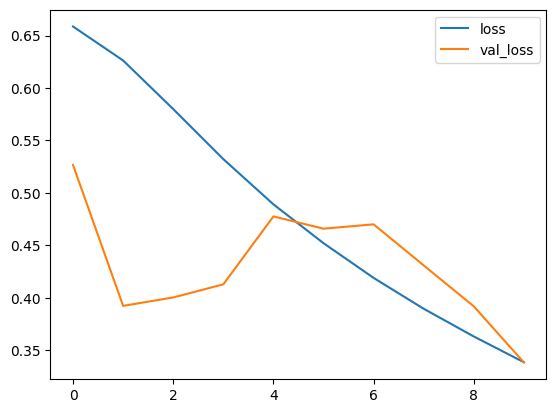

In [26]:
model_hist_df.plot()